#Import all required Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from numpy import mean
import math

read the CSV file and package it into a DataFrame:

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
names =['Hours','Scores']
dataset = pd.read_csv(url)
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Scatter Plots:

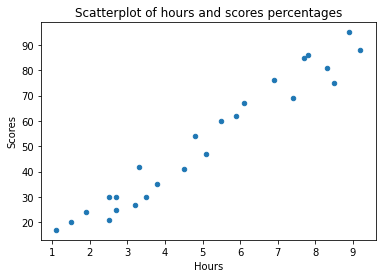

In [3]:
dataset.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages');

describe the dataset to get an idea of the mean, maximum, minimum, etc.

In [4]:
print(dataset.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


attribute the dataframe column values

In [5]:
y = dataset['Scores'].values.reshape(-1, 1)
x = dataset['Hours'].values.reshape(-1, 1)

shape attribute in Pandas enables us to obtain the shape of a DataFrame.

In [6]:
print(x.shape)
print(x)      

(25, 1)
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


splits the DataFrame into training and testing sets

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x , y ,test_size =0.2, random_state = 42)

# **Training a Linear Regression Model**




In [8]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred = regressor.predict(x_test)
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [16]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [22]:
mse = metrics.mean_squared_error(y_test,y_pred)
print("mse=",mse)

mse= 18.943211722315272


In [21]:
print("rmse=",math.sqrt(mse))

rmse= 4.352380006653288


In [11]:
cv =svm.SVC(kernel='linear', C=1, random_state=12)
scores=cross_val_score(regressor,x,y,cv=10)
scores

array([ 0.57949692,  0.87945559,  0.86969493,  0.95225096,  0.7219951 ,
        0.97633898,  0.95844674,  0.9458407 ,  0.76271338, -1.49457288])

In [13]:
hours = 9.25
predict_sc = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predict_sc[0][0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494
